In [1]:
print("start")

start


unet/diffusion_pytorch_model.safetensors not found


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


  0%|          | 0/50 [00:00<?, ?it/s]

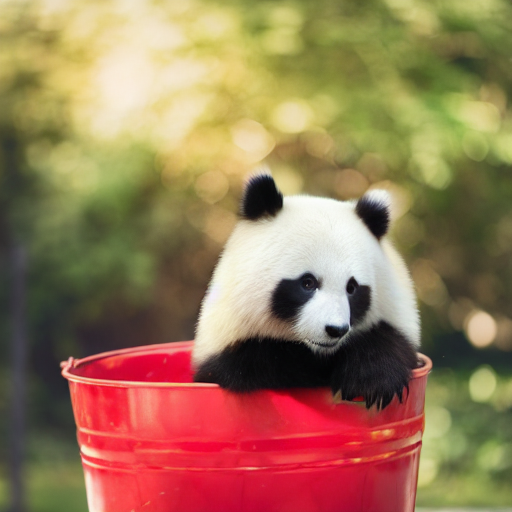

In [2]:
# Set cuda device to 3
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import PIL
import requests
import torch
from io import BytesIO
from diffusers import PaintByExamplePipeline


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
)
mask_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
)
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
example_image = download_image(example_url).resize((512, 512))

pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
image

vae/diffusion_pytorch_model.safetensors not found


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'image')

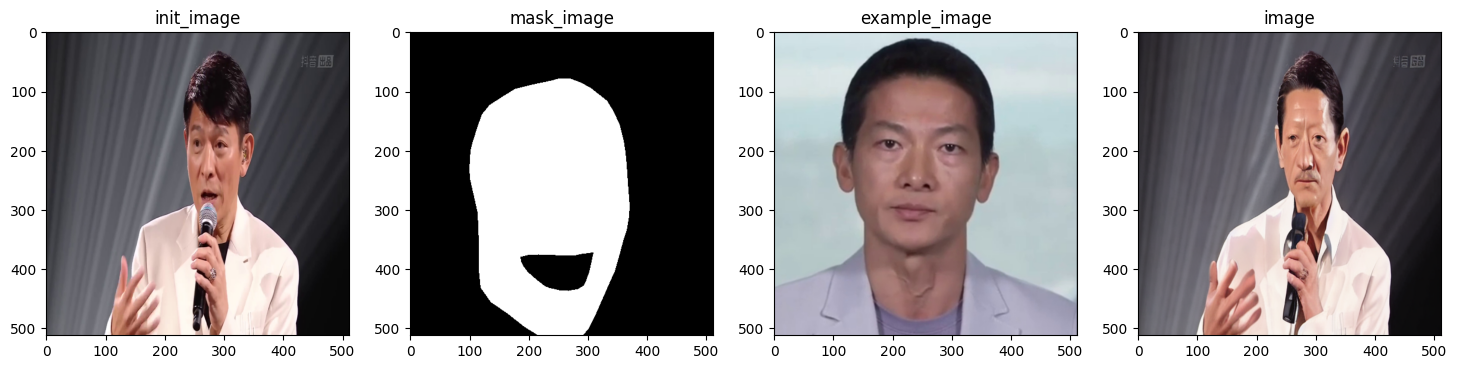

In [1]:
# Set cuda device to 3
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import PIL
import requests
import torch
from io import BytesIO
from diffusers import PaintByExamplePipeline
from PIL import Image, ImageChops

def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
)
mask_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
)
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

#open image from /home/sanoojan/e4s/example/input/faceswap/source.jpg

init_image= PIL.Image.open("/home/sanoojan/e4s/example/input/faceswap/andy/546.jpg").convert("RGB").resize((512, 512))
example_image= PIL.Image.open("/home/sanoojan/e4s/example/input/faceswap/peng/peng_800.jpg").convert("RGB").resize((512, 512))
mask_image= PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/00000_skin.png").convert("RGB").resize((512, 512))
mask_mouth=PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/00000_mouth.png").convert("RGB").resize((512, 512))
mask_image=ImageChops.subtract(mask_image,mask_mouth)


# init_image = download_image(img_url).resize((512, 512))
# mask_image = download_image(mask_url).resize((512, 512))
# example_image = download_image(example_url).resize((512, 512))

pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]

# plot the image, init_image, mask_image, example_image as subplots side by side

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(18, 30))
axs[0].imshow(init_image)
axs[0].set_title('init_image')
axs[1].imshow(mask_image)
axs[1].set_title('mask_image')
axs[2].imshow(example_image)
axs[2].set_title('example_image')
axs[3].imshow(image)
axs[3].set_title('image')




# image

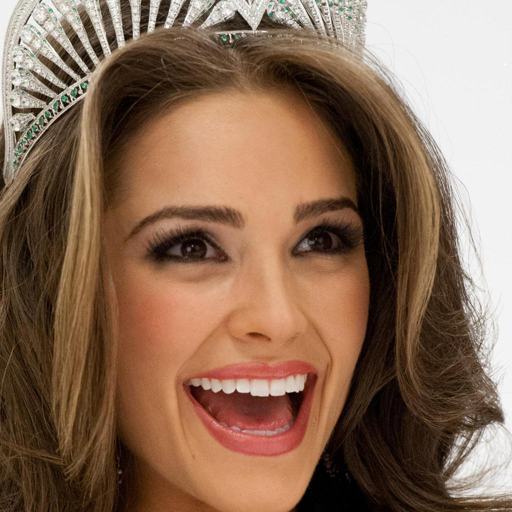

In [14]:
init_image

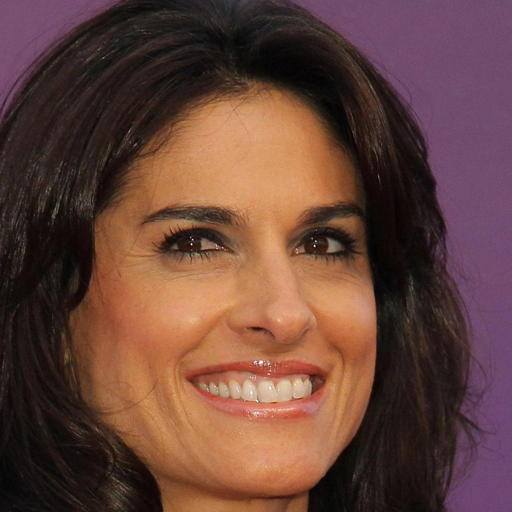

In [17]:
example_image

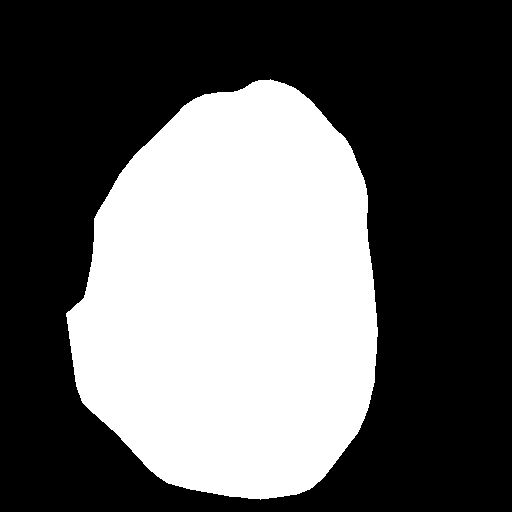

In [12]:
mask_image

In [ ]:
# Set cuda device to 3
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import PIL
import requests
import torch
from io import BytesIO
from diffusers import PaintByExamplePipeline
from PIL import Image, ImageChops

def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
)
mask_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
)
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

#open image from /home/sanoojan/e4s/example/input/faceswap/source.jpg
for i in range (10):
    init_image= PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-img/"+str(i)+".jpg").convert("RGB").resize((512, 512))
    example_image= PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-img/"+str(i+1)+".jpg").convert("RGB").resize((512, 512))
    mask_image= PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/0000"+str(i)+"_skin.png").convert("RGB").resize((512, 512))
    try:
        mask_mouth=PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/0000"+str(i)+"_mouth.png").convert("RGB").resize((512, 512))
        mask_image=ImageChops.subtract(mask_image,mask_mouth)
    except:
        print("no mouth mask")

    # init_image = download_image(img_url).resize((512, 512))
    # mask_image = download_image(mask_url).resize((512, 512))
    # example_image = download_image(example_url).resize((512, 512))

    pipe = PaintByExamplePipeline.from_pretrained(
        "Fantasy-Studio/Paint-by-Example",
        torch_dtype=torch.float16,
    )
    pipe = pipe.to("cuda")

    image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]

    # plot the image, init_image, mask_image, example_image as subplots side by side

    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1, 4, figsize=(18, 30))
    axs[0].imshow(init_image)
    axs[0].set_title('init_image')
    axs[1].imshow(mask_image)
    axs[1].set_title('mask_image')
    axs[2].imshow(example_image)
    axs[2].set_title('example_image')
    axs[3].imshow(image)
    axs[3].set_title('image')
    #save the image to /home/sanoojan/e4s/example/output/faceswap
    plt.savefig("/home/sanoojan/e4s/example/output/faceswap/"+str(i)+".jpg")




# image

In [6]:
# load video
import cv2
path="/home/sanoojan/e4s/example/input/faceswap/Andy2.mp4"
cap = cv2.VideoCapture(path)
# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video stream or file")
# Read until video is completed
for i in range (100,1000):
    ret, frame = cap.read()
    if ret == True:
        cv2.imwrite("/home/sanoojan/e4s/example/input/faceswap/andy/"+str(i)+".jpg", frame)
        # Display the resulting frame
        # cv2.imshow('Frame', frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

#546